<h3>NBA Player Salary Analysis</h3>

I love basketball, I love the NBA. Are you curious about salary distributions throughout the league as I am? It would be cool to explore contract sizes team by team, as well as player salaries within each team. I recently got inspiration from a post, <a href="http://www.stathunting.com/2015/08/18/2015-mls-salaries-and-you-can-add-hypothetical-signings-tableau-public-drogba/">MLS Salaries Visualization</a>, and deemed it super informative.

<a href="http://www.basketball-reference.com">Basketball Reference</a> is a terrific resource for NBA and Basketball data. We will start there to obtain the data from this page: <a href="http://www.basketball-reference.com/contracts/players.html">2015-2016 Player Contracts</a>.

We will then process the data and crank out some sweet visualizations! I'll walk through all the steps here in this Jupyter Python Notebook. :)

<b>Let's commence!</b>

Establish the import libraries we'll be using:

In [282]:
import pandas as pd
import matplotlib
import seaborn as sns
%matplotlib inline

Read in csv data. We're skipping the first row

In [32]:
fpath = r'data/contracts_players_contracts.csv'

In [33]:
df = pd.read_csv( fpath, skiprows=2 )

In [34]:
df

,Rk,Player,Tm,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,Signed Using,Guaranteed
0,1,Kobe Bryant,LAL,$25000000,NaN,NaN,NaN,NaN,NaN,Bird Rights,$25000000
1,2,Joe Johnson,BRK,$24894863,NaN,NaN,NaN,NaN,NaN,Bird Rights,$24894863
2,3,LeBron James,CLE,$22971000,$24004000,NaN,NaN,NaN,NaN,Cap Space,$22971000
3,4,Carmelo Anthony,NYK,$22875000,$24559380,$26243760,$27928140,NaN,NaN,Bird Rights,$73678140
4,5,Dwight Howard,HOU,$22359364,$23282457,NaN,NaN,NaN,NaN,Cap Space,$22359364
5,6,Chris Bosh,MIA,$22192730,$23741060,$25289390,$26837720,NaN,NaN,Bird Rights,$98060900
6,7,Chris Paul,LAC,$21468696,$22868828,$24268960,NaN,NaN,NaN,Bird Rights,$44337524
7,8,Kevin Durant,OKC,$20158622,NaN,NaN,NaN,NaN,NaN,Bird Rights,$20158622
8,9,Derrick Rose,CHI,$20093063,$21323250,NaN,NaN,NaN,NaN,Bird Rights,$41416313
9,10,Dwyane Wade,MIA,$20000000,NaN,NaN,NaN,NaN,NaN,Bird Rights,$20000000


Looks good, but if we look at the original data, every 20 lines or so, there is a blank line and a section heading. Thus, we'll need to go some processing before proceeding

In [56]:
df2 = df[ (pd.notnull(df['Player'])) & (df['Rk'] != 'Rk') ]

In [57]:
df2

,Rk,Player,Tm,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,Signed Using,Guaranteed
0,1,Kobe Bryant,LAL,$25000000,NaN,NaN,NaN,NaN,NaN,Bird Rights,$25000000
1,2,Joe Johnson,BRK,$24894863,NaN,NaN,NaN,NaN,NaN,Bird Rights,$24894863
2,3,LeBron James,CLE,$22971000,$24004000,NaN,NaN,NaN,NaN,Cap Space,$22971000
3,4,Carmelo Anthony,NYK,$22875000,$24559380,$26243760,$27928140,NaN,NaN,Bird Rights,$73678140
4,5,Dwight Howard,HOU,$22359364,$23282457,NaN,NaN,NaN,NaN,Cap Space,$22359364
5,6,Chris Bosh,MIA,$22192730,$23741060,$25289390,$26837720,NaN,NaN,Bird Rights,$98060900
6,7,Chris Paul,LAC,$21468696,$22868828,$24268960,NaN,NaN,NaN,Bird Rights,$44337524
7,8,Kevin Durant,OKC,$20158622,NaN,NaN,NaN,NaN,NaN,Bird Rights,$20158622
8,9,Derrick Rose,CHI,$20093063,$21323250,NaN,NaN,NaN,NaN,Bird Rights,$41416313
9,10,Dwyane Wade,MIA,$20000000,NaN,NaN,NaN,NaN,NaN,Bird Rights,$20000000


Cool. Now that we have each row as representation of a player's contract. Let's proceed by doing some more cleanup for the numbers

In [58]:
df2.columns

Index([u'Rk', u'Player', u'Tm', u'2015-16', u'2016-17', u'2017-18', u'2018-19',
       u'2019-20', u'2020-21', u'Signed Using', u'Guaranteed'],
      dtype='object')

In [59]:
df2.dtypes

Rk              object
Player          object
Tm              object
2015-16         object
2016-17         object
2017-18         object
2018-19         object
2019-20         object
2020-21         object
Signed Using    object
Guaranteed      object
dtype: object

In [62]:
for col in ['2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', u'Guaranteed']:
    df2.ix[:,col] = df2[col].replace( '\$', '', regex=True ).astype(float)

In [63]:
df2.head()

,Rk,Player,Tm,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,Signed Using,Guaranteed
0,1,Kobe Bryant,LAL,"$25,000,000.00",$nan,$nan,$nan,$nan,$nan,Bird Rights,"$25,000,000.00"
1,2,Joe Johnson,BRK,"$24,894,863.00",$nan,$nan,$nan,$nan,$nan,Bird Rights,"$24,894,863.00"
2,3,LeBron James,CLE,"$22,971,000.00","$24,004,000.00",$nan,$nan,$nan,$nan,Cap Space,"$22,971,000.00"
3,4,Carmelo Anthony,NYK,"$22,875,000.00","$24,559,380.00","$26,243,760.00","$27,928,140.00",$nan,$nan,Bird Rights,"$73,678,140.00"
4,5,Dwight Howard,HOU,"$22,359,364.00","$23,282,457.00",$nan,$nan,$nan,$nan,Cap Space,"$22,359,364.00"


We're going to change the pandas display format for floats:

In [64]:
pd.options.display.float_format = '${:,.2f}'.format

In [65]:
df2.head()

,Rk,Player,Tm,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,Signed Using,Guaranteed
0,1,Kobe Bryant,LAL,"$25,000,000.00",$nan,$nan,$nan,$nan,$nan,Bird Rights,"$25,000,000.00"
1,2,Joe Johnson,BRK,"$24,894,863.00",$nan,$nan,$nan,$nan,$nan,Bird Rights,"$24,894,863.00"
2,3,LeBron James,CLE,"$22,971,000.00","$24,004,000.00",$nan,$nan,$nan,$nan,Cap Space,"$22,971,000.00"
3,4,Carmelo Anthony,NYK,"$22,875,000.00","$24,559,380.00","$26,243,760.00","$27,928,140.00",$nan,$nan,Bird Rights,"$73,678,140.00"
4,5,Dwight Howard,HOU,"$22,359,364.00","$23,282,457.00",$nan,$nan,$nan,$nan,Cap Space,"$22,359,364.00"


Looking great! Let's quickly look at the distribution of NBA salaries

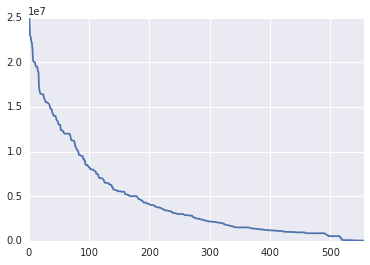

In [70]:
df2['2015-16'].plot()

Onto the actual NBA player analysis. First, group by team totals:

In [179]:
# groupby Team and sum up the 2015-16 current salary numbers
agg = df2[['Player', 'Tm', '2015-16']].groupby('Tm').sum()
agg.sort(['2015-16'], inplace=True, ascending=True)

In [180]:
agg

,2015-16
Tm,
POR,"$48,507,180.00"
PHI,"$59,804,365.00"
UTA,"$62,702,426.00"
ORL,"$67,924,555.00"
DEN,"$69,813,275.00"
IND,"$71,021,030.00"
ATL,"$71,575,734.00"
TOR,"$71,605,710.00"
SAC,"$71,840,771.00"


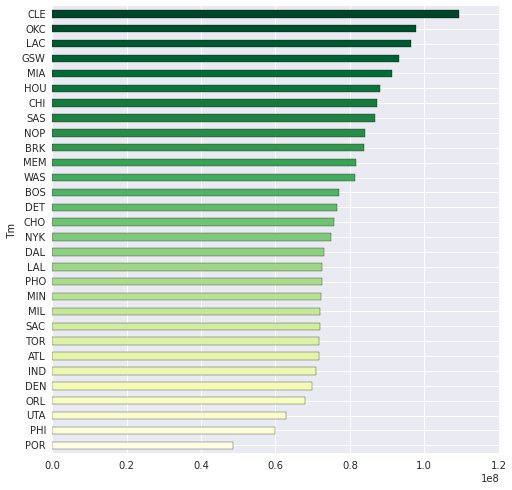

In [283]:
# Using matplotlib's colormap features, I added some color for fun!
agg.plot(kind='barh',
         figsize=(8,8),
         legend=False,
         color=plt.cm.ScalarMappable(cmap='YlGn').to_rgba(xrange(len(agg))) )

What portion do individual players make up the team salaries?

In [182]:
# we need to transform the data first to plot a stacked horizontal bar chart
# TEAM    PLAYER_1 PLAYER_2 ... PLAYER_X
# team1   p1-1     p1-2     ... p1-x
# team2   p2-1     p2-2     ... p2-x
# ...

In [183]:
agg2 = df2[['Player', 'Tm']].groupby('Tm').count()

In [184]:
# count of player assigned per team
agg2

,Player
Tm,
ATL,16
BOS,20
BRK,18
CHI,15
CHO,16
CLE,15
DAL,21
DEN,18
DET,20


In [239]:
teams = agg.index.tolist()

In [240]:
teams

['POR',
 'PHI',
 'UTA',
 'ORL',
 'DEN',
 'IND',
 'ATL',
 'TOR',
 'SAC',
 'MIL',
 'MIN',
 'PHO',
 'LAL',
 'DAL',
 'NYK',
 'CHO',
 'DET',
 'BOS',
 'WAS',
 'MEM',
 'BRK',
 'NOP',
 'SAS',
 'CHI',
 'HOU',
 'MIA',
 'GSW',
 'LAC',
 'OKC',
 'CLE']

In [241]:
lst = []

for team in teams:
    d = {}
    subdf = df2[df2['Tm'] == team ]
    players = subdf['Player'].tolist()
    contracts = subdf['2015-16'].tolist()

    d['team'] = team
    d['players'] = players
    
    for i, salary in enumerate(contracts):
        key = 'salary_{:02d}'.format(i+1)
        d[key] = salary
    lst.append(d)
    
df3 = pd.DataFrame.from_records( lst, index='team' )

In [242]:
df3

,players,salary_01,salary_02,salary_03,salary_04,salary_05,salary_06,salary_07,salary_08,salary_09,...,salary_12,salary_13,salary_14,salary_15,salary_16,salary_17,salary_18,salary_19,salary_20,salary_21
team,,,,,,,,,,,,,,,,,,,,,
POR,"[Al-Farouq Aminu, Ed Davis, Gerald Henderson, ...","$7,500,000.00","$7,000,000.00","$6,000,000.00","$5,000,000.00","$4,236,287.00","$3,075,880.00","$2,894,059.00","$2,854,940.00","$2,637,720.00",...,"$947,276.00","$845,059.00","$525,093.00","$525,093.00","$525,093.00",$nan,$nan,$nan,$nan,$nan
PHI,"[JaVale McGee, Gerald Wallace, Carl Landry, Jo...","$12,000,000.00","$10,105,855.00","$6,500,000.00","$4,626,960.00","$4,582,680.00","$3,457,800.00","$3,000,000.00","$2,869,440.00","$2,179,354.00",...,"$1,000,000.00","$947,276.00","$947,276.00","$902,698.00","$845,059.00","$845,059.00","$750,000.00","$525,093.00","$525,093.00",$nan
UTA,"[Gordon Hayward, Derrick Favors, Alec Burks, T...","$15,409,570.00","$11,933,333.00","$9,213,484.00","$4,775,000.00","$3,777,720.00","$3,000,000.00","$2,658,240.00","$2,250,000.00","$2,239,800.00",...,"$1,000,000.00","$981,348.00","$947,276.00","$947,276.00","$845,059.00","$75,000.00","$75,000.00","$50,000.00",$nan,$nan
ORL,"[Tobias Harris, Nikola Vucevic, Channing Frye,...","$16,000,000.00","$11,250,000.00","$7,807,579.00","$5,192,520.00","$5,000,000.00","$4,300,000.00","$4,171,680.00","$3,741,480.00","$2,505,720.00",...,"$1,294,440.00","$947,278.00","$845,059.00","$100,000.00","$100,000.00",$nan,$nan,$nan,$nan,$nan
DEN,"[Danilo Gallinari, Kenneth Faried, Wilson Chan...","$14,000,000.00","$11,235,955.00","$10,500,000.00","$5,613,500.00","$4,500,000.00","$3,333,333.00","$3,270,000.00","$3,102,240.00","$2,814,000.00",...,"$1,587,480.00","$1,499,187.00","$1,300,000.00","$1,015,421.00","$845,059.00","$845,059.00","$800,321.00",$nan,$nan,$nan
IND,"[Paul George, Monta Ellis, George Hill, Rodney...","$17,120,106.00","$10,300,000.00","$8,000,000.00","$6,500,000.00","$5,000,000.00","$4,394,225.00","$4,000,000.00","$4,000,000.00","$3,700,000.00",...,"$1,000,000.00","$1,000,000.00","$845,059.00","$845,000.00","$600,000.00",$nan,$nan,$nan,$nan,$nan
ATL,"[Paul Millsap, Al Horford, Tiago Splitter, Jef...","$19,000,000.00","$12,000,000.00","$8,500,000.00","$8,000,000.00","$5,746,479.00","$4,000,000.00","$3,333,333.00","$2,433,333.00","$2,000,000.00",...,"$1,000,000.00","$947,300.00","$947,276.00","$525,093.00","$75,000.00",$nan,$nan,$nan,$nan,$nan
TOR,"[DeMarre Carroll, Kyle Lowry, DeMar DeRozan, C...","$13,500,000.00","$12,000,000.00","$9,500,000.00","$7,000,000.00","$6,268,675.00","$4,660,482.00","$3,553,917.00","$3,000,000.00","$3,000,000.00",...,"$1,524,000.00","$1,509,360.00","$947,276.00","$650,000.00","$75,000.00","$25,000.00","$25,000.00","$25,000.00",$nan,$nan
SAC,"[DeMarcus Cousins, Rudy Gay, Rajon Rondo, Kost...","$14,728,844.00","$12,403,101.00","$9,500,000.00","$7,500,000.00","$6,333,333.00","$5,013,559.00","$3,398,280.00","$3,156,600.00","$3,000,000.00",...,"$981,348.00","$947,276.00","$923,670.00","$845,059.00","$525,093.00","$35,000.00","$35,000.00",$nan,$nan,$nan


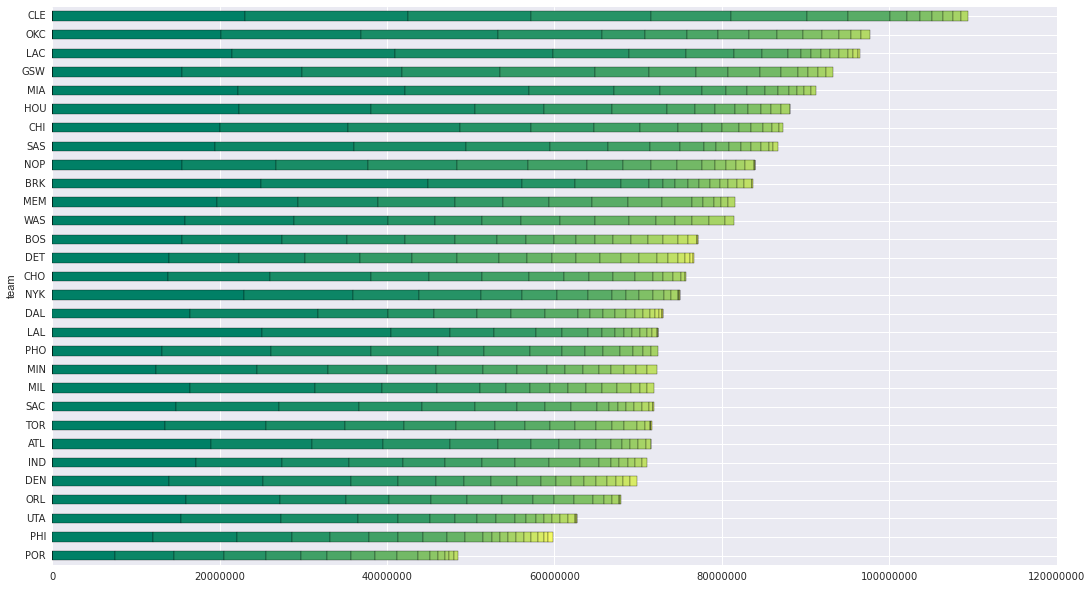

In [281]:
n = 10

ax = df3.plot(kind='barh',
         stacked=True,
         colormap='summer',
         figsize=(18, 10),
         sort_columns=True,
         legend=False
        )

ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
ax.figure.show()

In [72]:
#TODO:
# bokeh interactive stacked bar chart
# plotly interactive chart

# nba stats and player salary predictor, merge two datasets